In [1]:
import os
import sys
import numpy as np
import pandas as pd
import itertools
import yaml
import pickle
import multiprocessing
import time 
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from collections import OrderedDict

repo_dir = os.path.dirname(os.path.dirname(os.path.abspath("")))
sys.path.append(repo_dir)

from rmg_gua.gua_cantera.Spinning_basket_reactor.sbr import MinSBR

import_julia = True
if import_julia: 
# rms imports
    impt1 = time.time()
    from pyrms import rms
    from diffeqpy import de
    from julia import Main
    from rmg_gua.gua_rms.sbr import rms_sbr
    from rmg_gua.gua_peuqse.peuqse_utilities import get_highest_rms_file
    impt2 = time.time()
    print(f"import of julia packages took {impt2-impt1} seconds")

cantera version:  2.6
import of julia packages took 69.03770208358765 seconds


## 3. run one rms reactor with the modified mechanism.
plot the sensitivities and the flux diagram after. 

In [2]:
# if specified, use a different name for the results file. 
output_file_name = "rms_analysis.csv"

use_modified_rms = True
rmg_model_folder = os.path.join(repo_dir, "rmg_gua", "baseline",)

rms_file_path = get_highest_rms_file(rmg_model_folder)
output_sens_file = "rms_sensitivities_baseline.png" 
output_flux_file = "rms_fluxes__baseline"

# generate settings array
settings_yaml =os.path.join(repo_dir, "rmg_gua", "gua_cantera", "experiments_reorg_onlyopt.yaml")
with open(settings_yaml, 'r') as f:
    settings = yaml.safe_load(f)

# initialize reactor
sbr_ss = rms_sbr(
    rms_file_path,
    reac_config = settings[10],
    rtol=1.0e-11,
    atol=1.0e-22,
)

# results = sbr_ss.run_simulation()
# return results
# run the simulation
t1 = time.time()
sbr_ss.sol = de.solve(
    sbr_ss.react.ode,
    de.CVODE_BDF(),
    abstol=sbr_ss.atol,
    reltol=sbr_ss.rtol,)
t2 = time.time()
print("elapsed time for sim: ", t2-t1)


ssys = rms.SystemSimulation(sbr_ss.sol,sbr_ss.domains,sbr_ss.interfaces,sbr_ss.p)

# get the sensitivities. transitory sensitivities returns the full sensitivity matrix
# calculated from the jacobian. returns a (n_species, n_reactions) x (n_species, n_reactions) matrix, 
# so to just get the reaction sensitivities we single out a species for out row, then
# slice out the first n_species columns. 
sens_items, _ = rms.transitorysensitivitiesfulltrapezoidal(ssys, 1e-12, tau=Main.NaN, normalized=True)
# sens_items, _ = rms.transitorysensitivitiesfullexact(ssys, 0.001)
ind = ssys.names.index("CH3OH")
sens_items_rxn = sens_items[ind,len(ssys.names):]

elapsed time for sim:  19.640787839889526


RuntimeError: <PyCall.jlwrap (in a Julia function called from Python)
JULIA: UndefVarError: `sim` not defined
Stacktrace:
  [1] transitorysensitivitiesfulltrapezoidal(ssys::ReactionMechanismSimulator.SystemSimulation{Tuple{ReactionMechanismSimulator.Simulation{SciMLBase.ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Nothing, SciMLBase.ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, SciMLBase.ODEFunction{true, SciMLBase.FullSpecialize, ReactionMechanismSimulator.var"#dydt#595"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, ReactionMechanismSimulator.var"#jacy!#596"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, Nothing, Nothing, SparseArrays.SparseMatrixCSC{Float64, Int64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Nothing, Nothing, ReactionMechanismSimulator.var"#jacp!#597"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Sundials.CVODE_BDF{:Newton, :Dense, Nothing, Nothing}, SciMLBase.HermiteInterpolation{Vector{Float64}, Vector{Vector{Float64}}, Vector{Vector{Float64}}}, DiffEqBase.Stats, Nothing}, ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, Vector{ReactionMechanismSimulator.AbstractInterface}, Vector{String}, ReactionMechanismSimulator.var"#F#642"{SciMLBase.ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Nothing, SciMLBase.ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, SciMLBase.ODEFunction{true, SciMLBase.FullSpecialize, ReactionMechanismSimulator.var"#dydt#595"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, ReactionMechanismSimulator.var"#jacy!#596"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, Nothing, Nothing, SparseArrays.SparseMatrixCSC{Float64, Int64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Nothing, Nothing, ReactionMechanismSimulator.var"#jacp!#597"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Sundials.CVODE_BDF{:Newton, :Dense, Nothing, Nothing}, SciMLBase.HermiteInterpolation{Vector{Float64}, Vector{Vector{Float64}}, Vector{Vector{Float64}}}, DiffEqBase.Stats, Nothing}, SciMLBase.HermiteInterpolation{Vector{Float64}, Matrix{Float64}, Matrix{Float64}}}, Matrix{Float64}, Vector{ReactionMechanismSimulator.Species}, Vector{ReactionMechanismSimulator.ElementaryReaction}, Vector{Float64}}, ReactionMechanismSimulator.Simulation{SciMLBase.ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Nothing, SciMLBase.ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, SciMLBase.ODEFunction{true, SciMLBase.FullSpecialize, ReactionMechanismSimulator.var"#dydt#595"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, ReactionMechanismSimulator.var"#jacy!#596"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, Nothing, Nothing, SparseArrays.SparseMatrixCSC{Float64, Int64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Nothing, Nothing, ReactionMechanismSimulator.var"#jacp!#597"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Sundials.CVODE_BDF{:Newton, :Dense, Nothing, Nothing}, SciMLBase.HermiteInterpolation{Vector{Float64}, Vector{Vector{Float64}}, Vector{Vector{Float64}}}, DiffEqBase.Stats, Nothing}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, Vector{ReactionMechanismSimulator.ReactiveInternalInterfaceConstantTPhi{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, Matrix{Int64}, Vector{Float64}, Vector{Float64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.ElementaryReaction{ReactionMechanismSimulator.Arrhenius{Float64, Float64, Float64, ReactionMechanismSimulator.EmptyRateUncertainty}, Int64, V1, V2, V3, V4, Vector{Vector{String}}, Vector{Any}, Vector{Any}, Vector{Any}, Vector{Any}} where {V1<:AbstractArray, V2<:AbstractArray, V3<:AbstractArray, V4<:AbstractArray}}}, Vector{String}, ReactionMechanismSimulator.var"#F#642"{SciMLBase.ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Nothing, SciMLBase.ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, SciMLBase.ODEFunction{true, SciMLBase.FullSpecialize, ReactionMechanismSimulator.var"#dydt#595"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, ReactionMechanismSimulator.var"#jacy!#596"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, Nothing, Nothing, SparseArrays.SparseMatrixCSC{Float64, Int64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Nothing, Nothing, ReactionMechanismSimulator.var"#jacp!#597"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Sundials.CVODE_BDF{:Newton, :Dense, Nothing, Nothing}, SciMLBase.HermiteInterpolation{Vector{Float64}, Vector{Vector{Float64}}, Vector{Vector{Float64}}}, DiffEqBase.Stats, Nothing}, SciMLBase.HermiteInterpolation{Vector{Float64}, Matrix{Float64}, Matrix{Float64}}}, Matrix{Float64}, Vector{ReactionMechanismSimulator.Species}, Vector{ReactionMechanismSimulator.ElementaryReaction}, Vector{Float64}}}, SciMLBase.ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Nothing, SciMLBase.ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, SciMLBase.ODEFunction{true, SciMLBase.FullSpecialize, ReactionMechanismSimulator.var"#dydt#595"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, ReactionMechanismSimulator.var"#jacy!#596"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, Nothing, Nothing, SparseArrays.SparseMatrixCSC{Float64, Int64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Nothing, Nothing, ReactionMechanismSimulator.var"#jacp!#597"{Tuple{ReactionMechanismSimulator.ConstantTPDomain{ReactionMechanismSimulator.IdealGas{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ReactionMechanismSimulator.ConstantTAPhiDomain{ReactionMechanismSimulator.IdealSurface{Tuple{ReactionMechanismSimulator.Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{ReactionMechanismSimulator.EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactionMechanismSimulator.AbstractInterface}}, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Sundials.CVODE_BDF{:Newton, :Dense, Nothing, Nothing}, SciMLBase.HermiteInterpolation{Vector{Float64}, Vector{Vector{Float64}}, Vector{Vector{Float64}}}, DiffEqBase.Stats, Nothing}, Vector{ReactionMechanismSimulator.AbstractInterface}, ReactionMechanismSimulator.ElementaryReaction, ReactionMechanismSimulator.Species}, t::Float64; tau::Float64, normalized::Bool)
    @ ReactionMechanismSimulator ~/Documents/_01_code/RMG_env_1/ReactionMechanismSimulator.jl/src/TransitorySensitivities.jl:316
  [2] invokelatest(::Any, ::Any, ::Vararg{Any}; kwargs::Base.Pairs{Symbol, Real, Tuple{Symbol, Symbol}, NamedTuple{(:tau, :normalized), Tuple{Float64, Bool}}})
    @ Base ./essentials.jl:818
  [3] _pyjlwrap_call(f::Function, args_::Ptr{PyCall.PyObject_struct}, kw_::Ptr{PyCall.PyObject_struct})
    @ PyCall ~/opt/anaconda3/envs/rmg_env/share/julia/packages/PyCall/ilqDX/src/callback.jl:32
  [4] pyjlwrap_call(self_::Ptr{PyCall.PyObject_struct}, args_::Ptr{PyCall.PyObject_struct}, kw_::Ptr{PyCall.PyObject_struct})
    @ PyCall ~/opt/anaconda3/envs/rmg_env/share/julia/packages/PyCall/ilqDX/src/callback.jl:44
  [5] macro expansion
    @ ~/opt/anaconda3/envs/rmg_env/share/julia/packages/PyCall/ilqDX/src/exception.jl:108 [inlined]
  [6] #107
    @ ~/opt/anaconda3/envs/rmg_env/share/julia/packages/PyCall/ilqDX/src/pyfncall.jl:43 [inlined]
  [7] disable_sigint
    @ ./c.jl:473 [inlined]
  [8] __pycall!
    @ ~/opt/anaconda3/envs/rmg_env/share/julia/packages/PyCall/ilqDX/src/pyfncall.jl:42 [inlined]
  [9] _pycall!(ret::PyObject, o::PyObject, args::Tuple{Vector{String}}, nargs::Int64, kw::Ptr{Nothing})
    @ PyCall ~/opt/anaconda3/envs/rmg_env/share/julia/packages/PyCall/ilqDX/src/pyfncall.jl:29
 [10] _pycall!
    @ ~/opt/anaconda3/envs/rmg_env/share/julia/packages/PyCall/ilqDX/src/pyfncall.jl:11 [inlined]
 [11] #_#114
    @ ~/opt/anaconda3/envs/rmg_env/share/julia/packages/PyCall/ilqDX/src/pyfncall.jl:86 [inlined]
 [12] (::PyObject)(args::Vector{String})
    @ PyCall ~/opt/anaconda3/envs/rmg_env/share/julia/packages/PyCall/ilqDX/src/pyfncall.jl:86
 [13] top-level scope
    @ none:4
 [14] eval
    @ ./boot.jl:370 [inlined]
 [15] exec_options(opts::Base.JLOptions)
    @ Base ./client.jl:280
 [16] _start()
    @ Base ./client.jl:522>

In [ ]:
sens_items.shape
for spec in ssys.names:
    if sens_items[ssys.names.index(spec),0] > 0 or sens_items[ssys.names.index(spec),1] < 0: 
        print(spec)
        print(sens_items[ssys.names.index(spec),1])

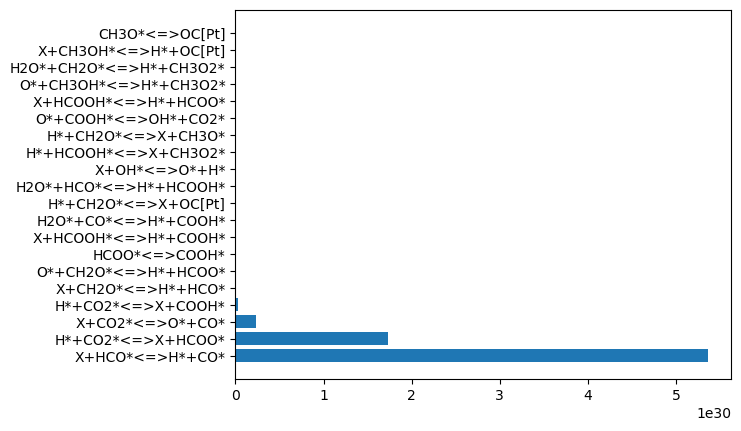

In [ ]:
%matplotlib inline
# get list of all rxns
rxn_strs = []
rxns_objs = []
for rxn in ssys.reactions: 
    rxn_strs.append(rms.getrxnstr(rxn))
    rxns_objs.append(rxn)

# I am assuming here that the rxns are in the same order as the sensitivity matrix
rxn_sens_dict = dict(zip(rxn_strs, sens_items_rxn))
# rxn_sens_dict = dict(zip(rxn_strs, sens_items))

# sort the dictionary by value
rxn_sens_dict_sort = dict(sorted(rxn_sens_dict.items(), key=lambda item: abs(item[1])))

# plot the top 10 most sensitive reactions
top10 = list(rxn_sens_dict_sort.items())[-20:]
top10.reverse()
rxn_strs = [x[0] for x in top10]
sens = [x[1] for x in top10]

plt.barh(rxn_strs, sens)
plt.savefig(os.path.join(rmg_model_folder, output_sens_file), dpi=300, bbox_inches='tight')
plt.show()

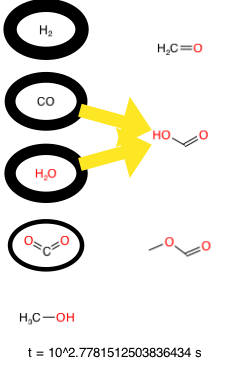

In [ ]:
rms.getfluxdiagram(ssys,600, centralspecieslist=['CO', 'CO2', 'CH3OH', 'H2'], radius=3, outputdirectory=output_flux_file)

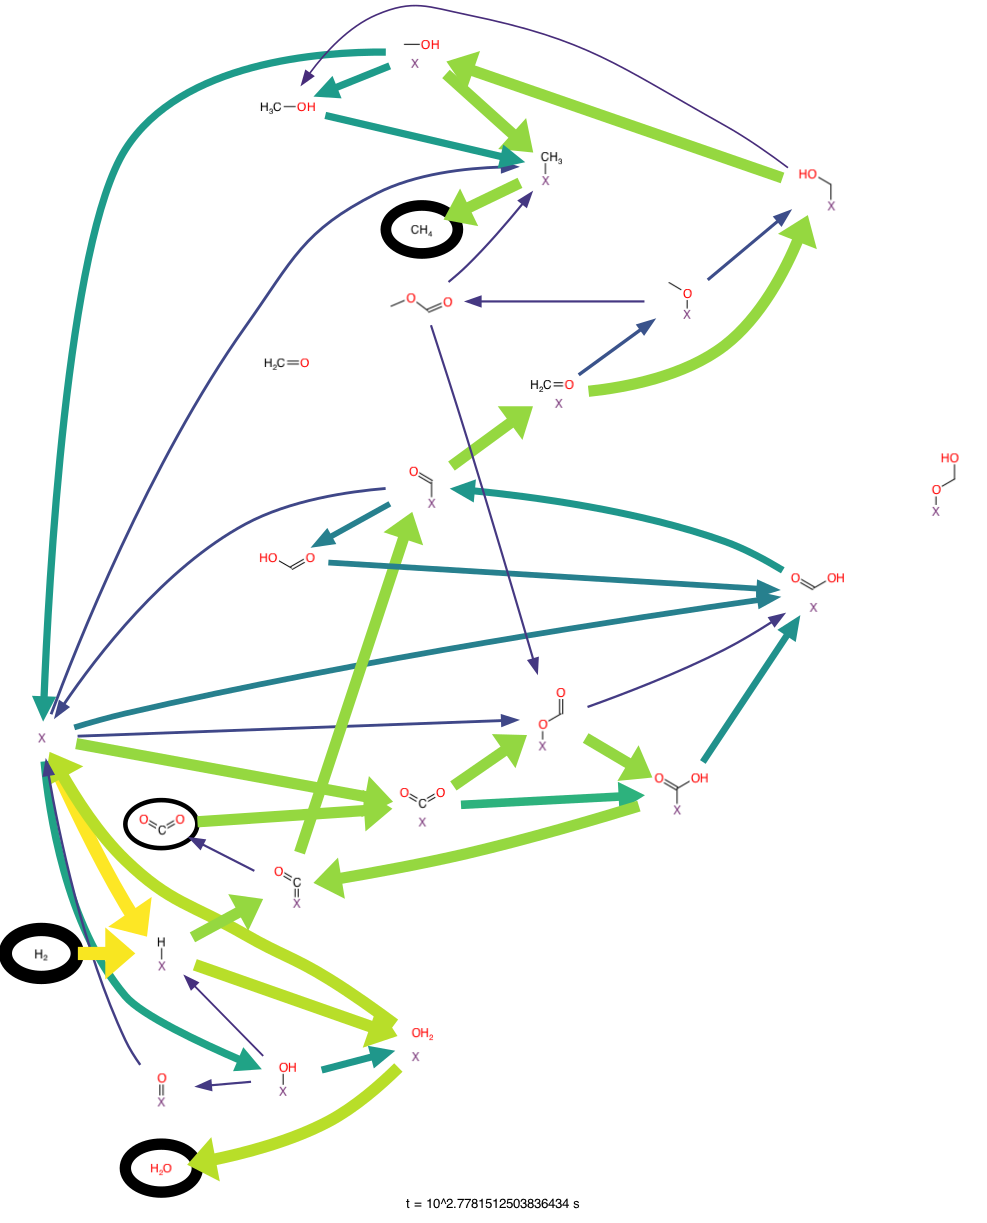

In [ ]:
rms.getfluxdiagram(ssys,600,outputdirectory=output_flux_file)

In [ ]:
# get list of reactions between ch2ohx and ch3x
from rmgpy.chemkin import load_chemkin_file
from rmgpy.rmg.model import ReactionModel

ck_model_path = os.path.join(rmg_model_folder, "chemkin", "chem_annotated-gas.inp")
species_dict_path = os.path.join(rmg_model_folder, "chemkin",  "species_dictionary.txt")
ck_surface_path = os.path.join(rmg_model_folder, "chemkin",  "chem_annotated-surface.inp")

model = ReactionModel()
model.species, model.reactions = load_chemkin_file(
    path=ck_model_path, 
    dictionary_path=species_dict_path,
    read_comments=True, 
    use_chemkin_names=True,
    surface_path = ck_surface_path,
)

### get reactions that have certain species as reactants or products

In [ ]:
# get reactant of interest
reac1 = model.species[8]

# get product of interest
prod1 = model.species[27]
display(reac1)
display(prod1)

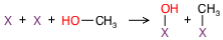

Average of [H2;VacantSite1;VacantSite2]
Estimated using template [Adsorbate;VacantSite1;VacantSite2] for rate rule [O-C;VacantSite1;VacantSite2]
Euclidian distance = 2.0
family: Surface_Adsorption_Dissociative
Ea raised from 30.8 to 31.3 kJ/mol to match endothermicity of reaction.


In [ ]:
reac_list = []
for reac in model.reactions:
    if reac1 in reac.reactants and prod1 in reac.products:
    # if prod1 in reac.products:
        reac_list.append(reac)
        display(reac) 
        print(reac.kinetics.comment)

In [ ]:
# save these reactions to pickle. 
with open("reac_list.pkl", 'wb') as f:
    pickle.dump(reac_list, f)

## 4. use the exported rms model and run for all expt conditions. plot tof on parity plot. 

In [ ]:
# run all the reactors in parallel
use_modified_rms = True
rmg_model_folder = os.path.join(repo_dir, "rmg_gua", "rmg_model",)
if use_modified_rms: 
    rms_file_path = os.path.join(rmg_model_folder, "rms", "chem_modified.yml")
    output_file_name = "rms_analysis_modified.csv"
else: 
    rms_file_path = get_highest_rms_file(rmg_model_folder)
    output_file_name = "rms_analysis_original.csv"

csv_path = os.path.join(rmg_model_folder, output_file_name)

# generate settings array
settings_yaml = os.path.join(repo_dir, "rmg_gua", "gua_cantera", "experiments_reorg_onlyopt.yaml")
with open(settings_yaml, 'r') as f:
    settings = yaml.safe_load(f)

def run_reactor(condts):

    # initialize reactor
    sbr_ss = rms_sbr(
        rms_file_path,
        reac_config = condts,
        rtol=1.0e-11,
        atol=1.0e-22,
    )

    results = sbr_ss.run_simulation()
    return results


# Too much memory? is that why it's slow?
# multiprocessing.set_start_method("spawn")
# with multiprocessing.Pool() as p:
#     result = p.map(run_reactor, settings)

result = []
# workaround: just run in serial
count = 0
ttot1 = time.time()
for condition in settings: 
    print("running ", count)
    
    t1 = time.time()
    res = run_reactor(condition)
    result.append(res)
    t2 = time.time()
    
    print(f"process took {t2-t1} seconds")

ttot2 = time.time()
print(f"all reactors took {ttot2-ttot1} seconds")

df = pd.DataFrame(result)

# post process results after pool is finished running
# we will only use runs where intraparticle diffusion limitations
# are not an issue, i.e. T < 518K
df_graaf = df[(df['T (K)'] < 518) & (df['experiment'] == 'graaf_1988') & (df['use_for_opt'] == True)]
df_graaf.to_csv(csv_path)

running  0
elapsed time for sim:  0.467235803604126
CC  not found in species list
CH4  not found in species list
process took 40.009886026382446 seconds
running  0
elapsed time for sim:  0.5434861183166504
CC  not found in species list
CH4  not found in species list
process took 3.684065103530884 seconds
running  0
elapsed time for sim:  0.572465181350708
CC  not found in species list
CH4  not found in species list
process took 3.807187080383301 seconds
running  0
elapsed time for sim:  0.32878994941711426
CC  not found in species list
CH4  not found in species list
process took 3.5217220783233643 seconds
running  0
elapsed time for sim:  0.3523600101470947
CC  not found in species list
CH4  not found in species list
process took 3.56402587890625 seconds
running  0
elapsed time for sim:  0.4856109619140625
CC  not found in species list
CH4  not found in species list
process took 3.433413028717041 seconds
running  0
elapsed time for sim:  0.5417091846466064
CC  not found in species list

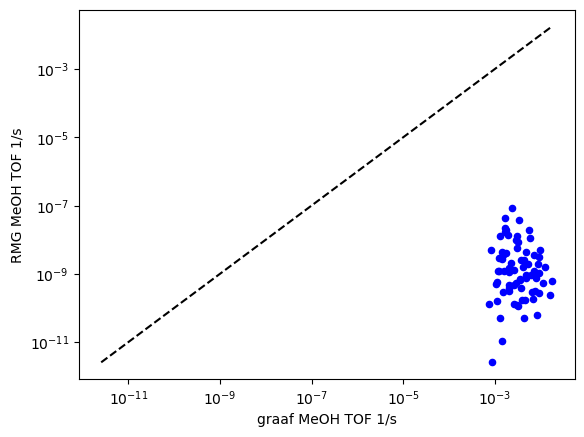

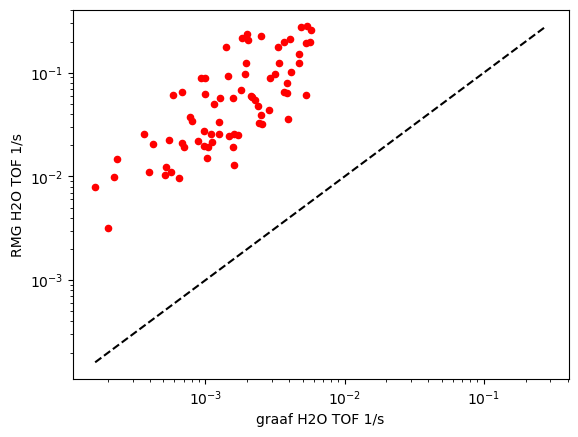

In [ ]:
# parity plot of the meoh tof


import numpy as np
csv_path = os.path.join(rmg_model_folder, "rms_analysis_original.csv")
df_graaf = pd.read_csv(csv_path)

meoh_max = max([df_graaf['graaf MeOH TOF 1/s'].max(), df_graaf['RMG MeOH TOF 1/s'].max()])
meoh_min = min([df_graaf['graaf MeOH TOF 1/s'].min(), df_graaf['RMG MeOH TOF 1/s'].min()])
meoh_line = np.logspace(np.log10(meoh_min), np.log10(meoh_max), 10)
plot1 = df_graaf.plot.scatter(x='graaf MeOH TOF 1/s', y='RMG MeOH TOF 1/s', c='blue', loglog=True)
plot1.plot(meoh_line,meoh_line, linestyle='--', c='black', )


# parity plot of the h2o tof
h2o_max = max([df_graaf['graaf H2O TOF 1/s'].max(), df_graaf['RMG H2O TOF 1/s'].max()])
h2o_min = min([df_graaf['graaf H2O TOF 1/s'].min(), df_graaf['RMG H2O TOF 1/s'].min()])
h2o_line = np.logspace(np.log10(h2o_min), np.log10(h2o_max), 10)
plot2 = df_graaf.plot.scatter(x='graaf H2O TOF 1/s', y='RMG H2O TOF 1/s', c='red', loglog=True)
plot2.plot(h2o_line, h2o_line,linestyle='--', c='black', )

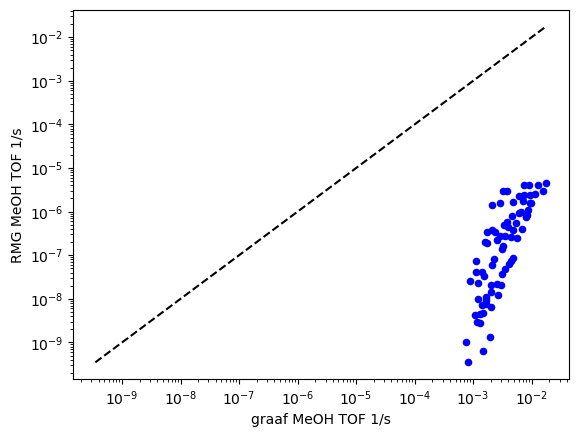

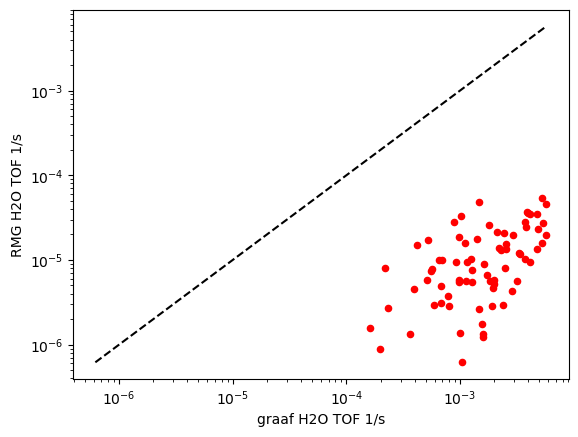

In [ ]:
# exact same code as above, except df_graaf is now df_graaf_modified
# parity plot of the meoh tof
csv_path = os.path.join(rmg_model_folder, "rms_analysis_modified.csv")
df_graaf_modified = pd.read_csv(csv_path)

meoh_max = max([df_graaf_modified['graaf MeOH TOF 1/s'].max(), df_graaf_modified['RMG MeOH TOF 1/s'].max()])
meoh_min = min([df_graaf_modified['graaf MeOH TOF 1/s'].min(), df_graaf_modified['RMG MeOH TOF 1/s'].min()])
meoh_line = np.logspace(np.log10(meoh_min), np.log10(meoh_max), 10)
plot1 = df_graaf_modified.plot.scatter(x='graaf MeOH TOF 1/s', y='RMG MeOH TOF 1/s', c='blue', loglog=True)
plot1.plot(meoh_line,meoh_line, linestyle='--', c='black', )

# parity plot of the h2o tof
h2o_max = max([df_graaf_modified['graaf H2O TOF 1/s'].max(), df_graaf_modified['RMG H2O TOF 1/s'].max()])
h2o_min = min([df_graaf_modified['graaf H2O TOF 1/s'].min(), df_graaf_modified['RMG H2O TOF 1/s'].min()])
h2o_line = np.logspace(np.log10(h2o_min), np.log10(h2o_max), 10)
plot2 = df_graaf_modified.plot.scatter(x='graaf H2O TOF 1/s', y='RMG H2O TOF 1/s', c='red', loglog=True)
plot2.plot(h2o_line, h2o_line,linestyle='--', c='black', )

In [ ]:
sens_rxn_obj_dict = {}
top10_dict = dict(top10)
for rxn in rxns_objs: 
    rxn_str = rms.getrxnstr(rxn)
    if rxn_str in top10_dict.keys():#and rxn_str not in sens_rxn_obj_dict.keys():
        sens = abs(rxn_sens_dict[rxn_str])
        print("sens: ", sens, "rxn: ", rxn_str)
        reac_spec = [make_spc(reac) for reac in rxn.reactants]
        prod_spec = [make_spc(prod) for prod in rxn.products]
        sens_rxn_obj_dict[rxn_str] = (sens, reac_spec, prod_spec)
sens_rxn_obj_dict

sens:  6.300549456876386e-14 rxn:  H2+CO<=>CH2O


NameError: name 'make_spc' is not defined

In [ ]:
# now match up the rms reaction sensitivities with the actual rxn in chemkin
# match species does forward and reverse. if there are multiple matches, it will
# print a warning.
match_list = []
sens_cmkn_dict = {}
for rxn_str, entry in sens_rxn_obj_dict.items():
    for rxn in model.reactions:
        counter = 0
        if rxn.matches_species(entry[1],entry[2]):
            print("match : ", rxn_str, counter)
            match_list.append(rxn_str)
            sens_cmkn_dict[rxn_str] = (entry[0], rxn)
        counter += 1
        if counter >=2: 
            print("more than 1 match found for ", rxn_str)
if len(match_list) == len(sens_rxn_obj_dict.keys()):
    print("all matches found")
else: 
    for rxn_str, entry in sens_rxn_obj_dict.items():
        if rxn_str not in match_list:
            print("no match found for ", rxn_str)

# use max key because we have taken abs(sensitivity)
max_key = max(sens_cmkn_dict, key=sens_cmkn_dict.get)
most_sens_rxn = sens_cmkn_dict[max_key][1]

# now pickle the most sensitive reaction
cmkn_pickle_path = os.path.join(rmg_model_folder, "sens_cmkn_dict.pickle")
with open(cmkn_pickle_path, "wb") as f:
    pickle.dump(most_sens_rxn, f)


In [ ]:
most_sens_rxn.get_source()